<a href="https://colab.research.google.com/github/sgulyano/mat202/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT-202 Lab 4: Image Filtering

CMKL University

By Sarun Gulyanon


### Goal

Introduce students to the fundamental concepts and techniques of image filtering. Students will gain practical experience in applying spatial filters to smooth images, detect edges, and extract textures.

### Outline

In this lab, students will explore and implement common image filtering techniques using OpenCV
1. Gaussian Blur
2. Sobel Operator
3. Edge Canny Algorithm
4. Gabor Filter

----

## 0. Getting Sample Images

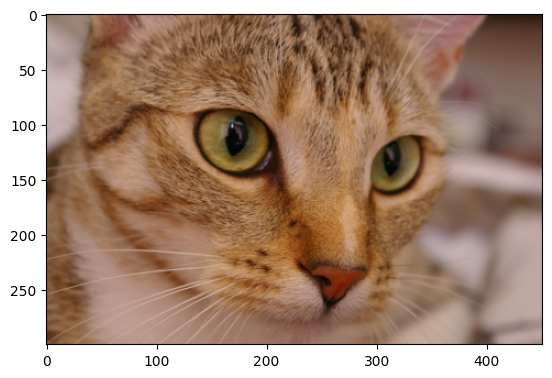

In [16]:
import cv2
import numpy as np
from skimage import data, color
from skimage.feature import canny
import matplotlib.pyplot as plt
%matplotlib inline


#@title Select Image {run: 'auto'}
image_name = 'cat' #@param ['astronaut', 'camera', 'cat', 'coffee', 'checkerboard', 'page']

image = getattr(data, image_name)()

if image.ndim < 3:
    plt.imshow(image, cmap='gray')
else:
    plt.imshow(image)
plt.show()

## 1. Gaussian Blur

This kernel helps produce a blurred image.
Its values are calculated using the Gaussian distribution, defined by the following formula:

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/eqns/eqngaus2.gif" alt="Gaussian Blur Formula" width="250px">

Here, $x$ and $y$ represent the distances from the center of the kernel along the X and Y axes.
For example, for a Gaussian distribution with mean $\mu=0$ and variance $\sigma=0$, the kernel will have a shape similar to the graph below:

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss2.gif" alt="Gaussian Blur Graph" width="250px">

We then discretize the continuous Gaussian function into a kernel. The example below shows a 5 x 5 kernel with $\mu=0$ and $\sigma=0$.

<img src="https://1.bp.blogspot.com/-KU3YUO8aImk/Uj8cDkwpcoI/AAAAAAAAAfY/uJ0Qy6fPIDImlk0lueZ4YVO3-6BE4rUHQCPcBGAYYCw/s1600/Gaussian%2BKernel.png" alt="Gaussian Blur Matrix" width="250px">

This operation can be performed using the OpenCV function `GaussianBlur`.

### Exercise

Try adjusting the kernel size and variance to observe how the resulting image changes.
(The mean value $\mu$ is always set to 0).

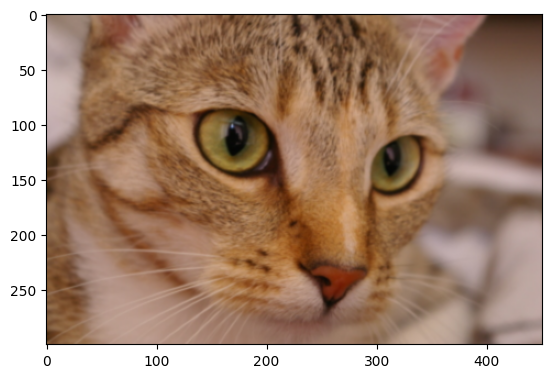

In [27]:
#@title Gaussian Blur {run: 'auto'}
kernel_size = 11 #@param {type:"slider", min:3, max:21, step:2}
sigma = 0.7 #@param {type:"slider", min:0.1, max:10, step:0.1}

dst = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

## 2. Sobel Operator

The Sobel operator is used to detect edges or object boundaries in an image.
It identifies regions where pixel intensity changes sharply by computing the image derivative, which measures differences in pixel values along the horizontal and vertical directions.

For the X-axis derivative using a 3 x 3 kernel, the following matrix is used:
$$ \begin{bmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$

For the Y-axis derivative using a 3 x 3 kernel, the following matrix is used:
$$ \begin{bmatrix}-1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

These operations can be performed using the `Sobel` function in OpenCV.


### Exercise

Try comparing the X-axis and Y-axis derivatives of the same image to observe how each highlights edges in different directions.

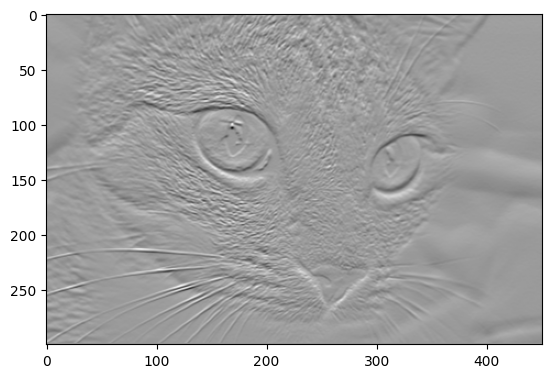

In [18]:
#@title Sorbel Operator {run: 'auto'}
grad_direction = 'Y' #@param ['X', 'Y']

scale = 1
delta = 0
ddepth = cv2.CV_16S

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if grad_direction == 'X':
    dx, dy = 1, 0
else:
    dx, dy = 0, 1

grad = cv2.Sobel(gray,
                 ddepth,
                 dx,
                 dy,
                 ksize=3,
                 scale=scale,
                 delta=delta,
                 borderType=cv2.BORDER_DEFAULT)

plt.imshow(grad, cmap='gray')
plt.show()

## 3.Edge Canny Algorithm

The Canny Edge Detection algorithm is another popular method for detecting object edges in an image.
It consists of four main steps:

1. Noise Reduction: Reduce image noise using a Gaussian Blur to prevent false edge detection.
2. Finding the Intensity Gradient: Use the Sobel operator to calculate image gradients, identifying areas with strong intensity changes.
3. Non-Maximum Suppression: Thin out the detected edges by keeping only the pixels with the highest gradient magnitude in their local neighborhood.
4. Hysteresis Thresholding: Perform post-processing to connect edge segments and eliminate weak or irrelevant edges.

This process can be implemented using the [`canny`](https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html) function.

### Exercise

Try applying the Canny algorithm and compare the results with the Sobel operator to observe how the Canny method produces smoother and more continuous edges.

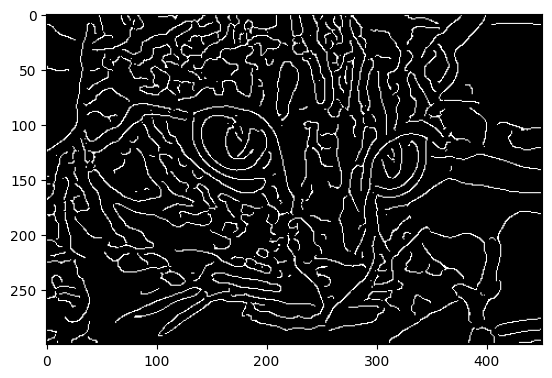

In [19]:
gray = color.rgb2gray(image)
gray = gray*255 / gray.max()
edges = canny(gray, sigma=3, low_threshold=1, high_threshold=20)
plt.imshow(edges, cmap='gray')

## 4. Gabor Filter

The Gabor filter is a technique used for texture analysis, which involves examining the patterns and surface details of objects in an image.
It consists of multiple kernels designed to analyze textures of various orientations and scales. Each kernel responds to a specific frequency and direction, allowing the filter to capture detailed texture information.

Applying a set of Gabor filters produces multiple output images, each representing the response of a particular kernel.
These responses can be combined to form a feature vector for each pixel, which is then used for further analysis or classification of texture patterns in the image.

This operation can be performed using the `getGaborKernel` function in OpenCV.

In [20]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

img = image.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

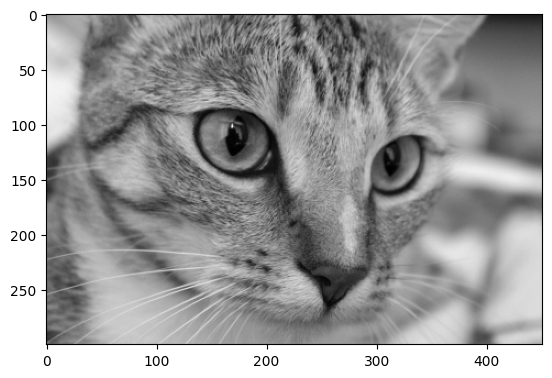

In [21]:
plt.imshow(img, cmap='gray')

The result obtained from one of the many kernels in a Gabor filter represents the image’s response to a specific orientation and frequency.

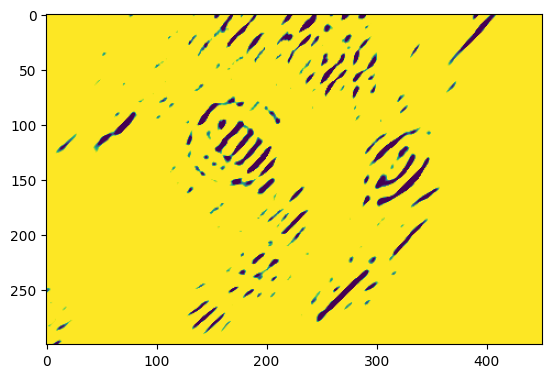

In [22]:
plt.imshow(filtered_img/255.0)

An example of a single Gabor kernel is shown below.

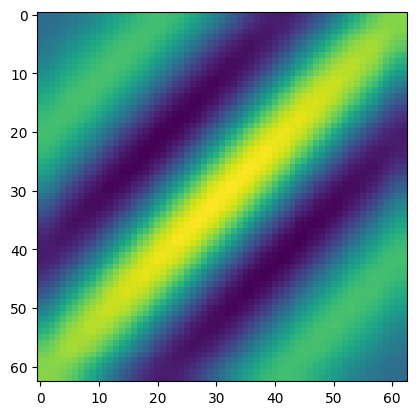

In [23]:
h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
plt.imshow(g_kernel)

----